In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


data = pd.read_csv('concrete_clean.csv')
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176,29.89
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714,23.51
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176,29.22
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176,45.85
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176,18.29
5,0.349315,0.000000,0.000000,0.560703,0.000000,0.258140,0.880582,0.244505,21.86
6,0.147945,0.696160,0.000000,0.652556,0.000000,0.507558,0.247366,0.016484,15.75
7,0.341096,0.000000,0.591204,0.532748,0.198758,0.661047,0.410687,0.151099,36.64
8,0.442922,0.000000,0.000000,0.560703,0.000000,0.825581,0.429002,0.074176,21.65
9,0.121005,0.511964,0.714643,0.576677,0.279503,0.229651,0.263422,0.074176,28.99


In [33]:
# Función para categorizar la resistencia
def categorizar_resistencia(f):
    if f < 21:
        return 1  # Baja resistencia
    elif 21 <= f < 35:
        return 2  # Resistencia media
    else:
        return 3  # Alta resistencia

# Reemplazar la columna 'strength' con su categoría
data['strength'] = data['strength'].apply(categorizar_resistencia)

# Mostrar el DataFrame actualizado
data.head(10)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176,2
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714,2
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176,2
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176,3
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176,1
5,0.349315,0.000000,0.000000,0.560703,0.000000,0.258140,0.880582,0.244505,2
6,0.147945,0.696160,0.000000,0.652556,0.000000,0.507558,0.247366,0.016484,1
7,0.341096,0.000000,0.591204,0.532748,0.198758,0.661047,0.410687,0.151099,3
8,0.442922,0.000000,0.000000,0.560703,0.000000,0.825581,0.429002,0.074176,2
9,0.121005,0.511964,0.714643,0.576677,0.279503,0.229651,0.263422,0.074176,2


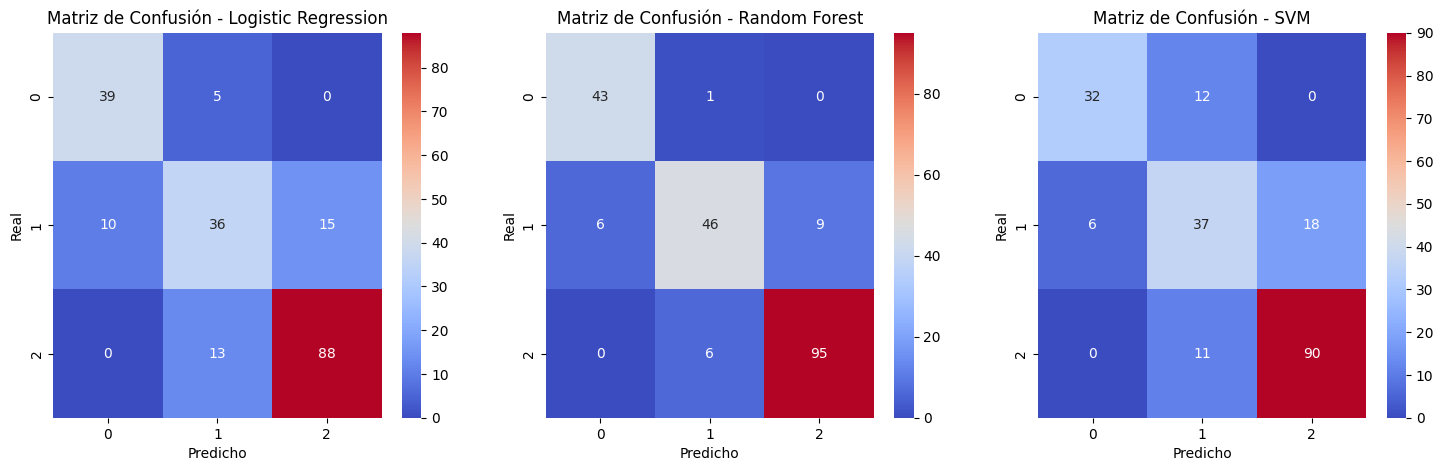

C:\Users\ardil\AppData\Local\Temp\ipykernel_29744\3632886919.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')


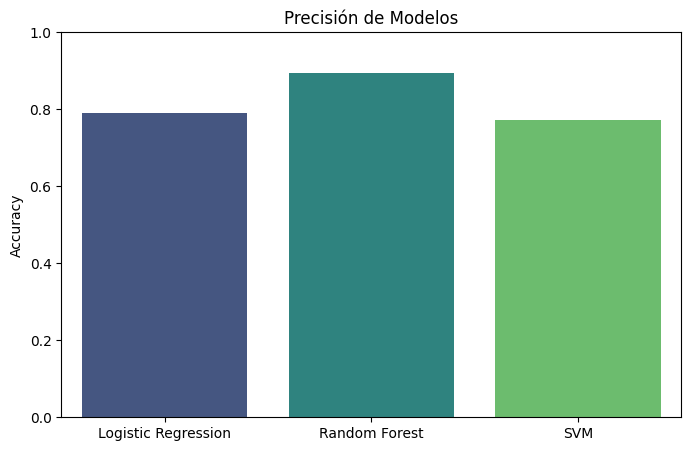

C:\Users\ardil\AppData\Local\Temp\ipykernel_29744\3632886919.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cv_scores.keys()), y=list(cv_scores.values()), palette='plasma')


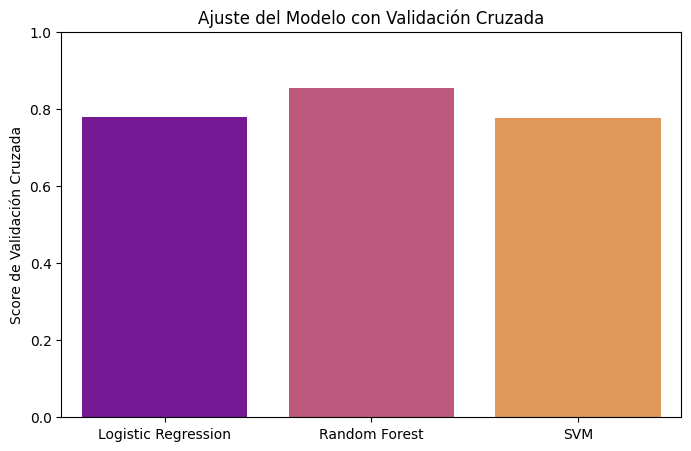

In [34]:

# Separar variables predictoras y objetivo
X = data.drop(columns=['strength'])
y = data['strength']

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos a entrenar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

# Entrenar modelos y evaluar desempeño
accuracy_results = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

# Graficar matrices de confusión
def plot_confusion_matrices(conf_matrices):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for ax, (name, cm) in zip(axes, conf_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=ax)
        ax.set_title(f'Matriz de Confusión - {name}')
        ax.set_xlabel('Predicho')
        ax.set_ylabel('Real')
    plt.show()

plot_confusion_matrices(conf_matrices)

# Gráfica de precisión de los modelos
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='viridis')
plt.title('Precisión de Modelos')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Validación cruzada y ajuste del modelo
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_scores[name] = np.mean(scores)

# Gráfico del ajuste del modelo
plt.figure(figsize=(8, 5))
sns.barplot(x=list(cv_scores.keys()), y=list(cv_scores.values()), palette='plasma')
plt.title('Ajuste del Modelo con Validación Cruzada')
plt.ylabel('Score de Validación Cruzada')
plt.ylim(0, 1)
plt.show()
